# Neural Combinatorial Optimization Datasets

Neural combinatorial optimization has been employed on a variety of datasets. However, since this field is often concerned with solving classic optimization problems, benchmark "datasets" are often just standard instances of these problems.

Beside the dataset included in <a href="https://github.com/Optimization-Algorithms-Book/Code-Listings/blob/0a6087f721e454d683998dd4f5f647d391c589fe/Appendix%20B/Listing%20B.3_CO_datasets.ipynb">Listing B.3_CO_datasets</a>, here are examples of datasets for neural combinatorial optimization:

| Benchmark Dataset     | Description | Sources |
| --- | --- | --- |
| Convex Hull | The problem of finding or computing a convex hull, given a set of points. A convex hull is a geometric shape, specifically a polygon, that fully encompasses a given set of points. It achieves this by optimizing two distinct parameters - it maximizes the area that the shape covers, while simultaneously minimizing the boundary or circumference of the shape. | <a href="https://drive.google.com/drive/folders/0B2fg8yPGn2TCMzBtS0o4Q2RJaEU?resourcekey=0-46fqXNrTmcUA4MfT6GLcIg">PTR_NETS</a> |
|TSP|Dataset form training and testing TSP using Pointer Networks|<a href="https://drive.google.com/drive/folders/0B2fg8yPGn2TCMzBtS0o4Q2RJaEU?resourcekey=0-46fqXNrTmcUA4MfT6GLcIg">PTR_NETS</a>|
|TLC Trip Record Data |Yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. | <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page">Taxi & Lumousine NYC</a>|
|Graph data |RelBench is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on relational databases. | <a href="https://relbench.stanford.edu/">RelBench</a>|



## Convex Hull

The official data is hosted at http://goo.gl/NDcOIG. It can be manually downloaded using the web interface or using gdown as follows:

```bat
$gdown --folder --output data https://drive.google.com/drive/folders/0B2fg8yPGn2TCMzBtS0o4Q2RJaEU
```

The following is an example from one of the lines from convex_hull_10_test.txt file. It contains the 2d coordinates (in the format x_1 y_1 x_2 y_2 … x_N y_N) followed by the word “output” as a separator, and then the indices of the corresponding outputs (base 1) of the input points. In the example below, the convex hull was 2 8 10 3 5 9 2 (note that the last digit is repeated as it forms a tour), i.e., first point (0.83574749, 0.71767531), followed by second point (0.97514538, 0.43225133), etc.

0.83574749 0.71767531 0.97514538 0.43225133 0.00156428 0.79504183 0.49708063 0.72999268 0.07801648 0.61818596 0.43538240 0.48421687 0.07054918 0.78761384 0.80407655 0.85087664 0.30599502 0.21130504 0.26632123 0.89586666 output 2 8 10 3 5 9 2 

The name of the files should be self explanatory (some contain a range of inputs points N).

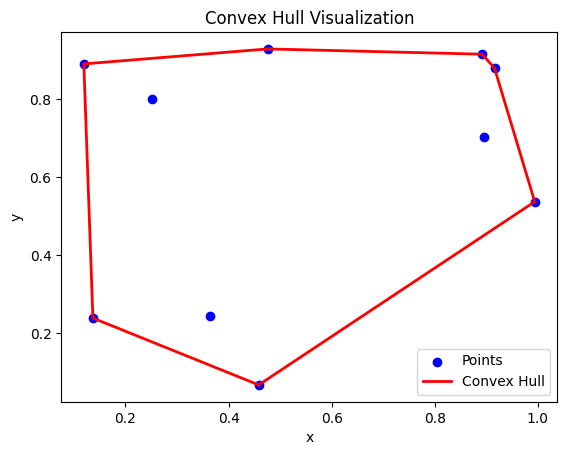

In [1]:
import matplotlib.pyplot as plt

# Read the file
with open('data/PtrNets/convex_hull_10_test.txt', 'r') as f:
    data = f.readline().split('output')  # only read the first line

# Parse coordinates
coords_raw = data[0].strip().split()
points = [(float(coords_raw[i]), float(coords_raw[i+1])) for i in range(0, len(coords_raw), 2)]

# Parse solution
convex_hull_indices = list(map(int, data[1].strip().split()))

# Extract the coordinates of the convex hull points
convex_hull_points = [points[i-1] for i in convex_hull_indices]

# Extract x and y coordinates separately
x = [point[0] for point in points]
y = [point[1] for point in points]

# Plot the points
plt.scatter(x, y, color='blue', label='Points')

# Plot the convex hull
hull_x = [point[0] for point in convex_hull_points]
hull_y = [point[1] for point in convex_hull_points]
plt.plot(hull_x, hull_y, color='red', linestyle='-', linewidth=2, label='Convex Hull')

# Set the axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Convex Hull Visualization')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# TSP

Read and visualize the first line in tsp_20_test.txt

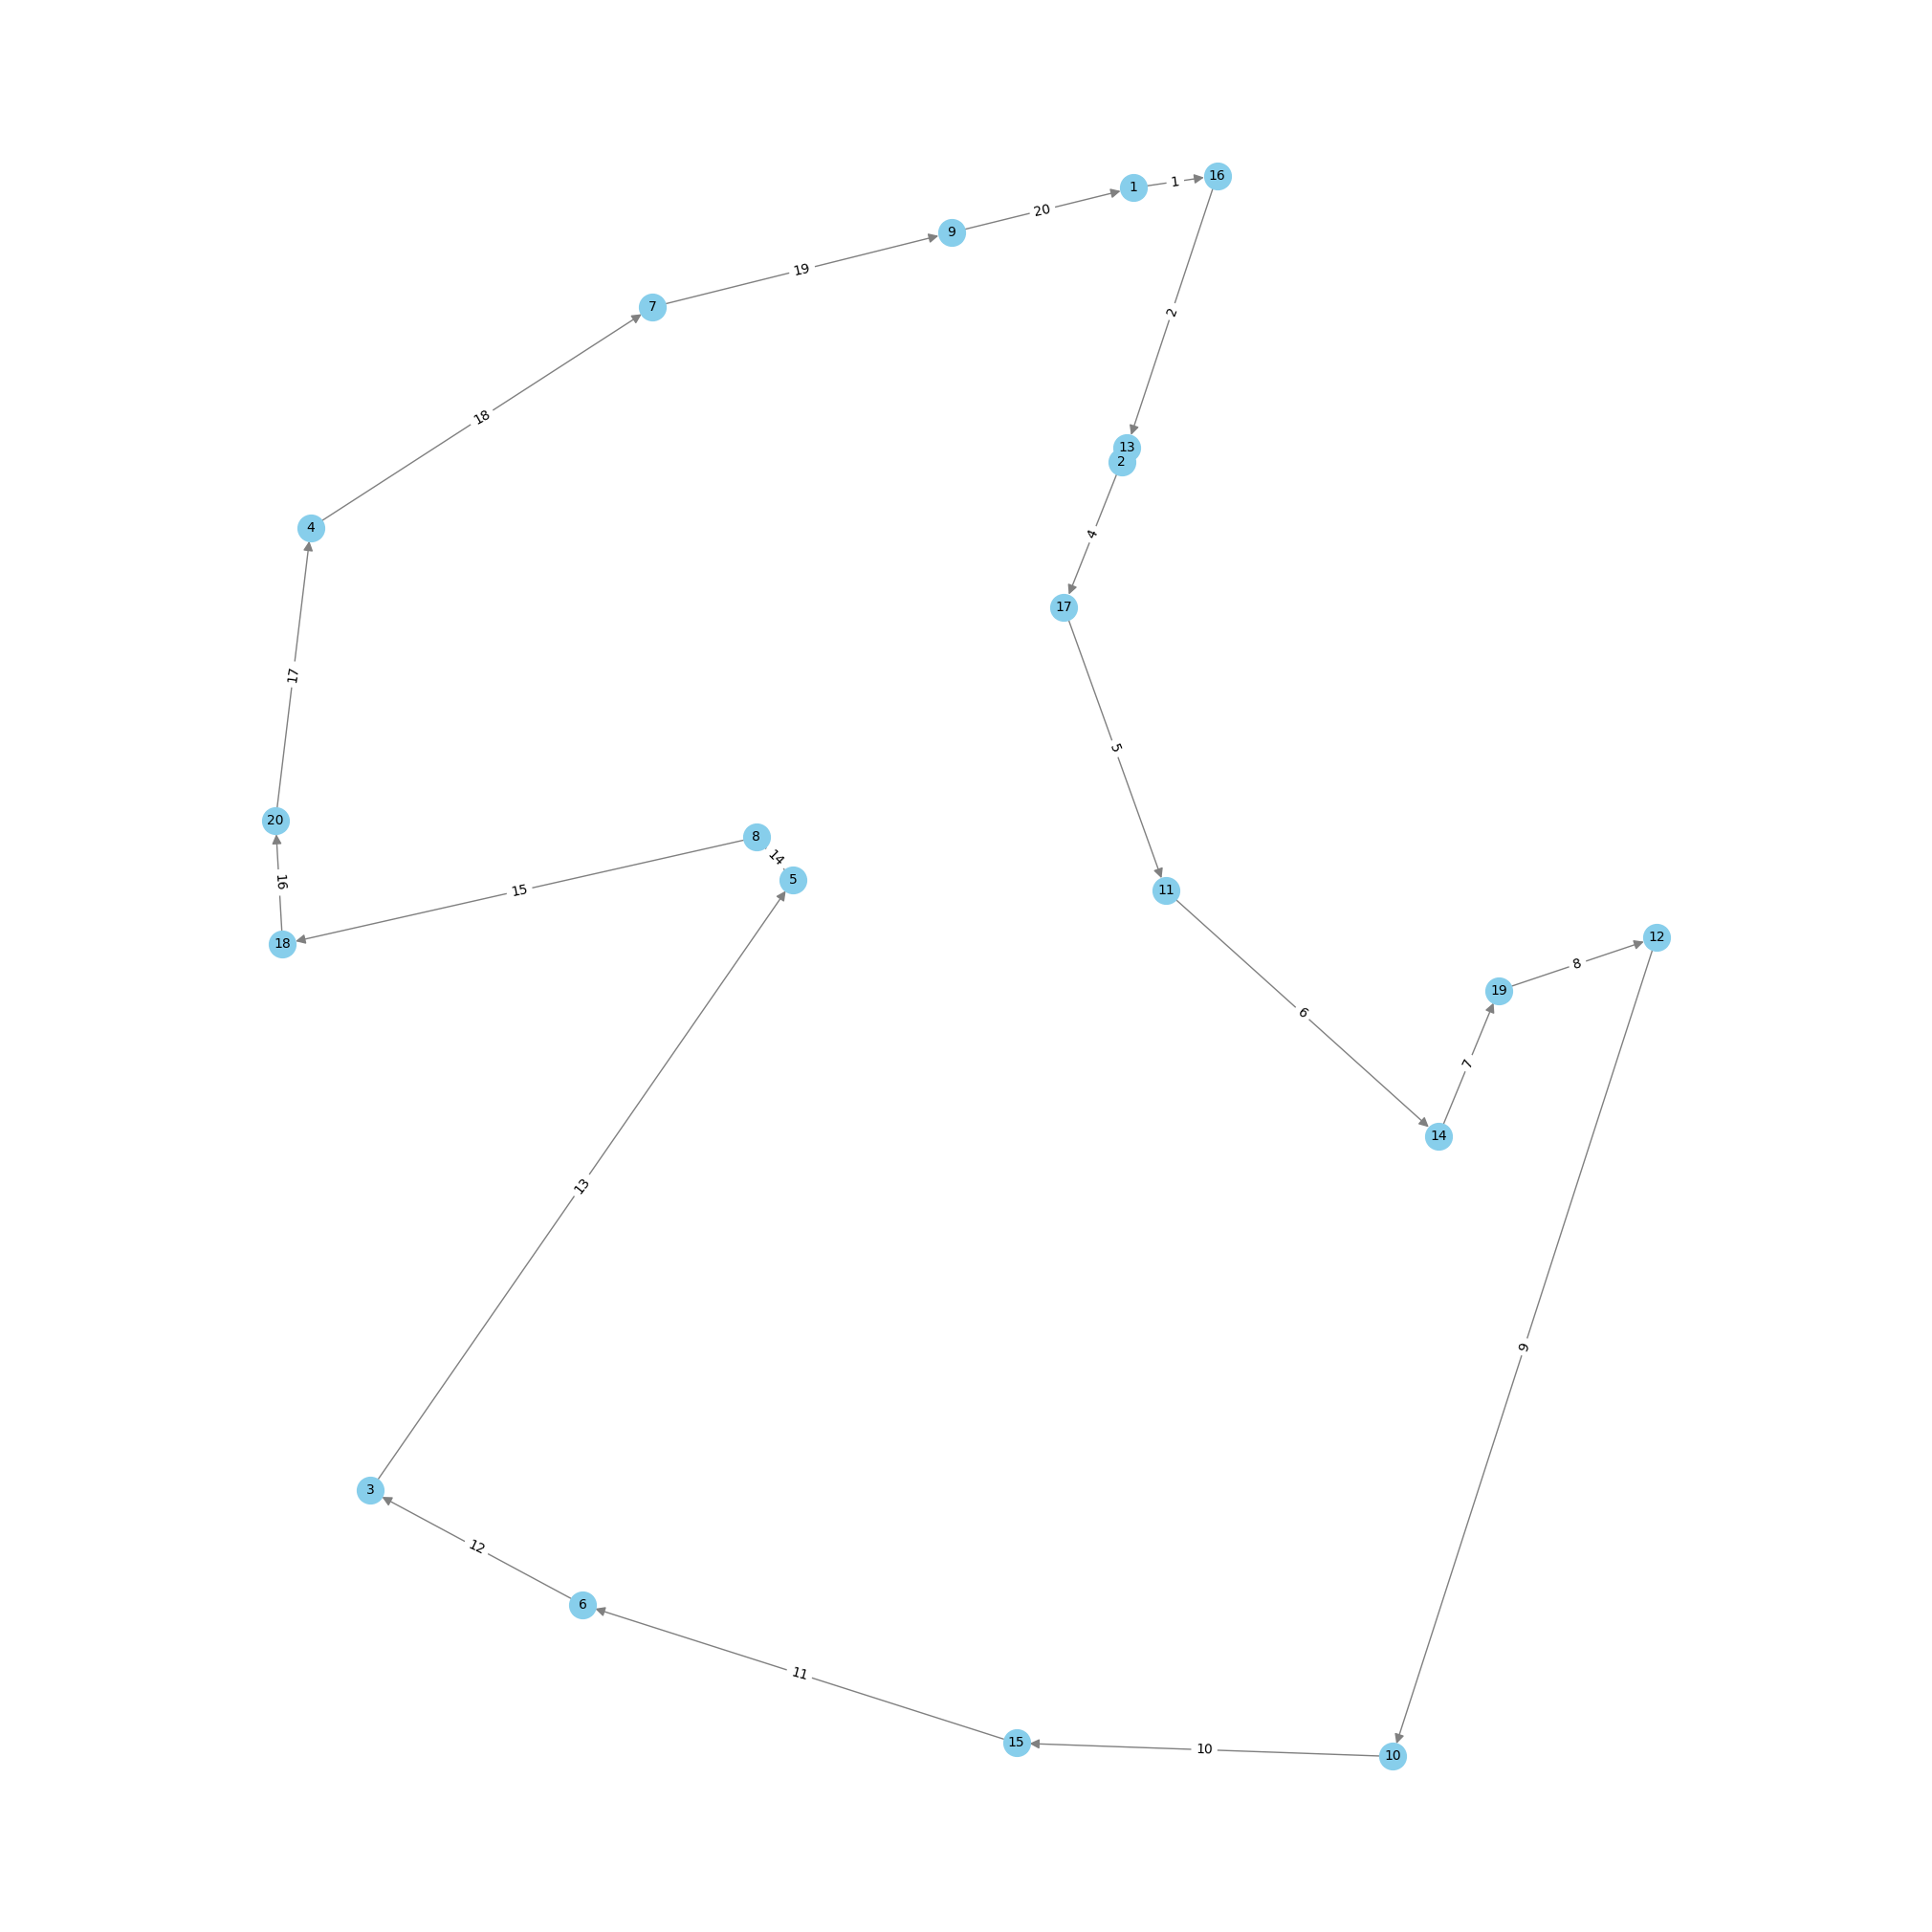

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Read the file
with open('data/PtrNets/tsp_20_test.txt', 'r') as f:
    data = f.readline().split('output')  # only read the first line

# Parse coordinates
coords_raw = data[0].strip().split()
coords = [(float(coords_raw[i]), float(coords_raw[i+1])) for i in range(0, len(coords_raw), 2)]

# Parse solution
solution = list(map(int, data[1].strip().split()))

# Create graph
G = nx.DiGraph()
G.add_nodes_from([(i, {"pos": coords[i-1]}) for i in solution])

# Add edges according to solution
edges = [(solution[i-1], solution[i]) for i in range(1, len(solution))]
G.add_edges_from(edges)


# Draw graph
plt.figure(figsize=(20, 20))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=400, font_size=10, arrowstyle='-|>', arrowsize=15, 
        node_color='skyblue', edge_color='gray')

# Draw edge labels (indices)
edge_labels = {edge: i+1 for i, edge in enumerate(edges)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.axis('equal')  # Equal aspect ratio ensures that the graph is displayed correctly.
plt.show()